# AI-Generated vs Human-Generated Text Classification System 

Build an end-to-end Machine Learning/NLP project that detects whether a given text sample is 
authored by a human or generated by an AI model.
This is a highly relevant real-world problem for:
• Media companies (fake news detection)
• Education (AI-written assignments)
• Finance & Banking (AI-written fraud/scam emails)
• Healthcare (AI-written clinical notes detection)
• Marketing (AI vs human generated ads)

1. Problem Understanding & Business Use Cases
Define at least 3 real applications

2. Data Ingestion & Preprocessing
Dataset contains:
• text
• label (Human / AI model e.g., GPT, Bard, Claude)

About Dataset:
Around 500K essays are available in this dataset, both created by AI and written by Human.

link: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text?utm_source=chatgpt.com

In [2]:
#! pip install spacy

In [3]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [10]:
#Load Dataset
df = pd.read_csv("aih.csv")
print(df.head(5))

                                                text  generated
0  The passage "In German Suburb, Life Goes On Wi...        0.0
1  Driverless cars are more expensive and require...        0.0
2   I believe that the principal should consider ...        1.0
3  In 1976, the Viking 1 set course to Mars. When...        0.0
4  The importance of community service is often o...        1.0


In [11]:
# Basic information

print('The Shape of the Data: ', df.shape)
print('\nThe coloumns of the data:\n ', df.columns.to_list())
print('\nThe Data Type:\n ', df.dtypes.value_counts())

The Shape of the Data:  (5000, 2)

The coloumns of the data:
  ['text', 'generated']

The Data Type:
  object     1
float64    1
Name: count, dtype: int64


DataSet contains 2 columns(numeric amd categorical) and  and 487235 rows. 

In [12]:
# Statistical summury
print('The Statistical Summary: \n')
df.describe()

The Statistical Summary: 



,generated
count,5000.000000
mean,0.383400
std,0.486263
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
# Missing values
print('The DataTypes with Non-Null Values: ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       5000 non-null   object 
 1   generated  5000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.3+ KB
The DataTypes with Non-Null Values:  None


In [14]:
print('Missing Values: \n')
df.isnull().sum()

Missing Values: 



text         0
generated    0
dtype: int64

Dataset contains null missing values

In [15]:
# Check duplicates

print(df['text'].duplicated().sum())

0


 DateSet contains 0 identical texts. 

In [16]:
# Target value distibution
df['generated'].value_counts()

generated
0.0    3083
1.0    1917
Name: count, dtype: int64

The dataset is almost evenly split between AI and human-generated text

In [17]:
# Converting generated column to int
df['generated']=df['generated'].astype(int)
print(df.head())

                                                text  generated
0  The passage "In German Suburb, Life Goes On Wi...          0
1  Driverless cars are more expensive and require...          0
2   I believe that the principal should consider ...          1
3  In 1976, the Viking 1 set course to Mars. When...          0
4  The importance of community service is often o...          1


 0 for Human, 1 for AI

## Text cleaning

In [18]:
# putting all leters in lowercase

df['text'] = df['text'].str.lower()
print(df['text'].head(2))

0    the passage "in german suburb, life goes on wi...
1    driverless cars are more expensive and require...
Name: text, dtype: object


In [19]:
# Rempoving all punctuation

df['text']=df['text'].str.replace(r'[^\w\s]', '', regex=True)
print(df['text'].head(2))

# check if any punctuation is still in text
print(df['text'].str.contains(r'[^\w\s]', regex=True, na=False).any())

0    the passage in german suburb life goes on with...
1    driverless cars are more expensive and require...
Name: text, dtype: object
False


 All texts are without punctuation and all letters are in lowercase

In [20]:
# Calculating text legth

df['length']=df['text'].apply(lambda x: len(str(x).split()))
print(df.head())

                                                text  generated  length
0  the passage in german suburb life goes on with...          0     350
1  driverless cars are more expensive and require...          0     394
2   i believe that the principal should consider ...          1     289
3  in 1976 the viking 1 set course to mars when t...          0     349
4  the importance of community service is often o...          1     370


In [21]:
#!python -m spacy download en_core_web_sm

In [22]:
# creating columns with text after lemmatization using SpaCy

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

docs = nlp.pipe(
    df['text'],
    batch_size=1000,
    n_process=24   
)

df['text_lemma'] = [
    " ".join(tok.lemma_ for tok in doc if not tok.is_space)
    for doc in docs
]
print(df.head())

                                                text  generated  length  \
0  the passage in german suburb life goes on with...          0     350   
1  driverless cars are more expensive and require...          0     394   
2   i believe that the principal should consider ...          1     289   
3  in 1976 the viking 1 set course to mars when t...          0     349   
4  the importance of community service is often o...          1     370   

                                          text_lemma  
0  the passage in german suburb life go on withou...  
1  driverless car be more expensive and require m...  
2  I believe that the principal should consider a...  
3  in 1976 the vike 1 set course to mar when the ...  
4  the importance of community service be often o...  


Text after lemmatization contains words in their base form. Only for English language.

In [25]:
# handling long text truncatiom
#from transformers import AutoTokenizer
max_words = 800
df['text_trunc']=df['text_lemma'].apply (lambda x: ' '.join(x.split()[:max_words]))

print(df[['text_lemma', 'text_trunc']].head())


                                          text_lemma  \
0  the passage in german suburb life go on withou...   
1  driverless car be more expensive and require m...   
2  I believe that the principal should consider a...   
3  in 1976 the vike 1 set course to mar when the ...   
4  the importance of community service be often o...   

                                          text_trunc  
0  the passage in german suburb life go on withou...  
1  driverless car be more expensive and require m...  
2  I believe that the principal should consider a...  
3  in 1976 the vike 1 set course to mar when the ...  
4  the importance of community service be often o...  


after truncation all rows contains maximum 800 words. 

## EDA

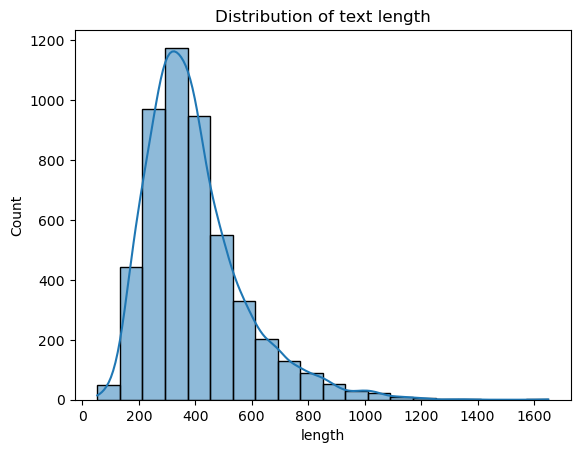

In [26]:
# distribution of length of words
sns.histplot(x='length', data=df, kde=True, bins=20)
plt.title("Distribution of text length")

plt.show()

We see positive skewness. It means that the most texts are short, they contains obout 250-400 words. 
Using 800 words for truncation allow as to cover 95% of all texts for ML

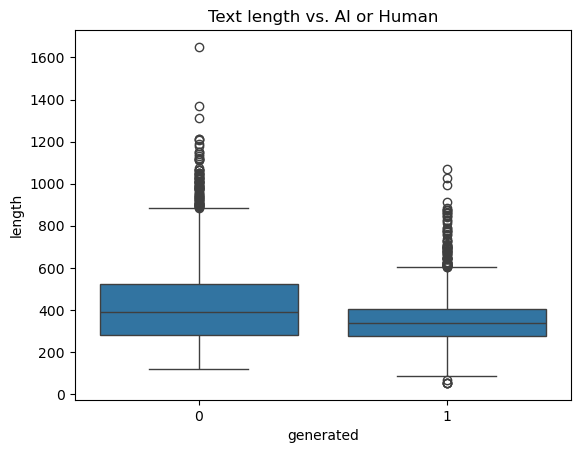

In [27]:
# text length vs label(AI or Human)
sns.boxplot(x='generated', y='length', data=df)
plt.title("Text length vs. AI or Human")
plt.show()

It is common that people mostly write longer texts. AI write shorter texts. 

In [29]:
# Analysing most common words
from collections import Counter
gr = df['generated'].unique()
r =[]
for g in gr:
    text = ' '.join(df[df['generated'] == g]['text'])
    w = text.split()
    counter = Counter(w)
    most_com = counter.most_common(25)
    for w, freq in most_com:
        r.append({
            "label": g,
            "word": w,
            "frequency": freq
        })
df_com = pd.DataFrame(r)
print(df_com)

    label      word  frequency
0       0       the      62697
1       0        to      45265
2       0         a      30975
3       0       and      30263
4       0        of      25145
5       0        in      22086
6       0      that      21351
7       0        is      19599
8       0        it      16123
9       0       you      15705
10      0      they      14208
11      0        be      14114
12      0       for      13397
13      0      have      11987
14      0       are      11526
15      0       not       9968
16      0        on       9671
17      0         i       9353
18      0  students       9090
19      0      this       8980
20      0    people       8660
21      0       can       8648
22      0     would       8499
23      0     their       8428
24      0        or       7981
25      1       the      28399
26      1       and      23180
27      1        to      22783
28      1        of      16472
29      1         a      16336
30      1        in      12419
31      

We have created Dataframe with most common words for both AI an Human-generated texts

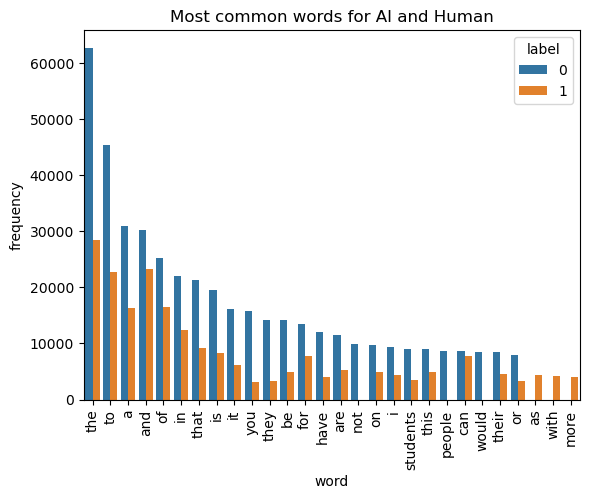

In [30]:
# most common words pre class
sns.barplot(x='word', y='frequency', data=df_com, hue='label')
plt.title("Most common words for AI and Human")
plt.xticks(rotation=90)
plt.show()

Some words like the, to, that, in are more common in humans texts. This words are more simple and personalized.
More neutral and complicated words are mostly common for AI-generated texts 

In [31]:
# Building Wordclouds for Human and AI using text after truncation

human = " ".join(df[df['generated']==0]['text_trunc'])
ai = " ".join(df[df['generated']==1]['text_trunc'])

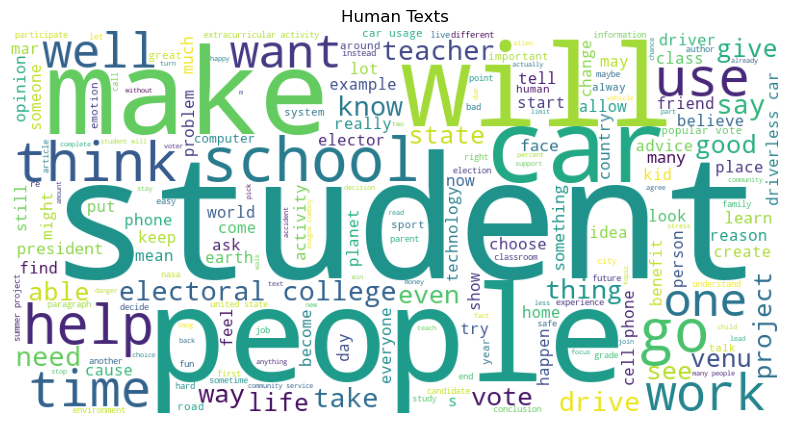

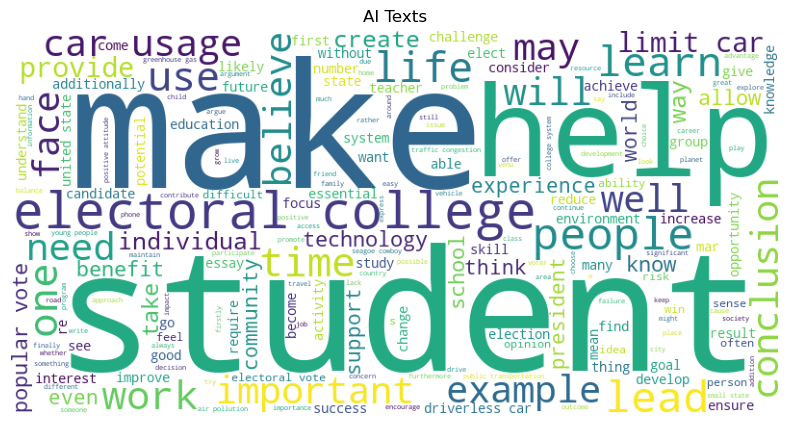

In [32]:
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
)

plt.figure(figsize=(10,5))
plt.imshow(wc.generate(human))
plt.axis("off")
plt.title("Human Texts")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wc.generate(ai))
plt.axis("off")
plt.title("AI Texts")
plt.show()

Comparison of both clouds shows how different the human's vocabulary from AI's vocabulary is. 

In [33]:
# Basic n-gramm extraction
def get_top_ngrams(corpus, ngram_range=(2,2), n=20):
    vec = CountVectorizer(
        ngram_range=ngram_range,
        min_df=5
    )
    X = vec.fit_transform(corpus)
    freqs = X.sum(axis=0).A1
    return pd.Series(freqs, index=vec.get_feature_names_out()) \
             .sort_values(ascending=False) \
             .head(n)

human_ngrams = get_top_ngrams(
    df[df.generated==0]["text_trunc"],
    (2,2)
)

ai_ngrams = get_top_ngrams(
    df[df.generated==1]["text_trunc"],
    (2,2)
)

In [34]:
# phrase-level stylistic differences.
pd.concat(
    [human_ngrams.rename("Human"),
     ai_ngrams.rename("AI")],
    axis=1
).fillna(0)

,Human,AI
in the,4991.0,2011.0
do not,4793.0,919.0
of the,4750.0,3034.0
it be,3344.0,1803.0
be not,2722.0,0.0
to be,2716.0,1034.0
electoral college,2704.0,2045.0
have to,2646.0,0.0
there be,2546.0,1249.0
the electoral,2478.0,2072.0


We see TOP-20 wotrds that are typical for AI and for Human-generted texts. Scores shows how typical this words are for both sources.

In [35]:
def log_odds(human, ai, alpha=1):

    vocab = set(human) | set(ai)
    total_h = sum(human.values())
    total_a = sum(ai.values())

    scores = {}
    for w in vocab:
        h = human.get(w, 0) + alpha
        a = ai.get(w, 0) + alpha
        scores[w] = np.log(h/(total_h-h)) - np.log(a/(total_a-a))

    return pd.Series(scores).sort_values()

In [36]:
human_dict=human_ngrams.to_dict()
ai_dict=ai_ngrams.to_dict()
log_odds(human_dict, ai_dict, alpha=1)

lead to             -7.978420
can be              -7.910503
car usage           -7.808691
that the            -7.789537
can help            -7.747322
in conclusion       -7.666937
believe that        -7.630263
limit car           -7.608733
such as             -7.559789
the electoral       -0.568207
electoral college   -0.462512
of the              -0.294183
on the              -0.250510
it be               -0.102523
there be            -0.001817
to the               0.171733
be the               0.209335
in the               0.212551
to be                0.262991
do not               0.993079
go to                6.910441
want to              6.916203
the student          6.976647
for the              6.987461
they be              7.036700
would be             7.088273
to do                7.105083
have to              7.216441
be not               7.246185
dtype: float64

We've got positive score that a typical for human, and negative score - typical for AI

In [37]:
# Complexity measures: lexical diversity
def lexical_diversity(text):
    tokens = text.split()
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)


df['lex_div'] = df['text_trunc'].apply(lexical_diversity)
print(df.head())

                                                text  generated  length  \
0  the passage in german suburb life goes on with...          0     350   
1  driverless cars are more expensive and require...          0     394   
2   i believe that the principal should consider ...          1     289   
3  in 1976 the viking 1 set course to mars when t...          0     349   
4  the importance of community service is often o...          1     370   

                                          text_lemma  \
0  the passage in german suburb life go on withou...   
1  driverless car be more expensive and require m...   
2  I believe that the principal should consider a...   
3  in 1976 the vike 1 set course to mar when the ...   
4  the importance of community service be often o...   

                                          text_trunc   lex_div  
0  the passage in german suburb life go on withou...  0.521368  
1  driverless car be more expensive and require m...  0.335025  
2  I believe that

Blexica diversity display how variously the used vocabulary is.

In [38]:
#Complexity measures: Flesch score
from textstat import flesch_reading_ease

df['flesch_score'] = df['text_lemma'].apply(flesch_reading_ease)
print(df.head())

                                                text  generated  length  \
0  the passage in german suburb life goes on with...          0     350   
1  driverless cars are more expensive and require...          0     394   
2   i believe that the principal should consider ...          1     289   
3  in 1976 the viking 1 set course to mars when t...          0     349   
4  the importance of community service is often o...          1     370   

                                          text_lemma  \
0  the passage in german suburb life go on withou...   
1  driverless car be more expensive and require m...   
2  I believe that the principal should consider a...   
3  in 1976 the vike 1 set course to mar when the ...   
4  the importance of community service be often o...   

                                          text_trunc   lex_div  flesch_score  
0  the passage in german suburb life go on withou...  0.521368   -266.086410  
1  driverless car be more expensive and require m...  


  
90–100	- Very easy 
60–70	- Standard
0–30	- Very difficult 
<0      - Exctremely hard
For human typical score is 50-80, while for AI this score usually about 80-90.


In [39]:
# Visualisation of  lexical diversity and   Flesch score

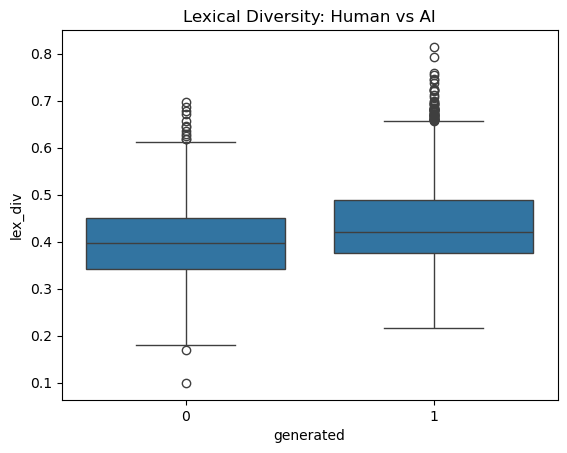

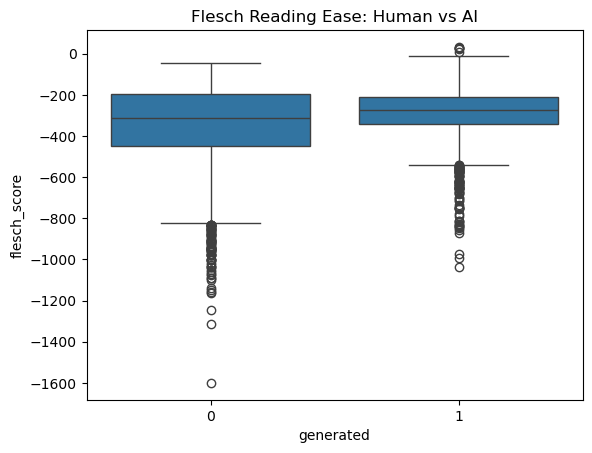

In [40]:
sns.boxplot(x='generated', y='lex_div', data=df)
plt.title('Lexical Diversity: Human vs AI')
plt.show()

sns.boxplot(x='generated', y='flesch_score', data=df)
plt.title('Flesch Reading Ease: Human vs AI')
plt.show()

Lexical diversity by human is lower then by AI. But by analysing Flesh reading easy score we see that by human values are slightly higher and more destributed

## Feature Engineering

In [91]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

bow= CountVectorizer(
    ngram_range=(1,2), 
    stop_words='english',
    max_features=5000
)

Bag-of-Words is a text representation method that encodes documents as vectors of word frequencies, disregarding word order and syntax.

In [92]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=5000,
    min_df=5,
    max_df=1.0
)


TF-IDF is a vectorization method that weights words by their importance within a document relative to their frequency across the corpus, emphasizing discriminative terms while down-weighting common ones.

In [93]:
#! pip install gensim

In [94]:
import gensim, numpy, sys
print("gensim:", gensim.__version__)
print("numpy:", numpy.__version__)
print("python:", sys.version)

gensim: 4.4.0
numpy: 2.3.5
python: 3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:09:58) [MSC v.1929 64 bit (AMD64)]


In [113]:
# Word2Vec
import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

sentences = [text.split() for text in df['text_trunc']]

w2v_model = Word2Vec(
    sentences,
    vector_size=50,  # dimension
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

class W2VTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
        self.dim = model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.Series(X).astype(str)
        vectors = []

        for text in X:
            tokens = text.split()
            vecs = [self.model.wv[w] for w in tokens if w in self.model.wv]

            if len(vecs) == 0:
                vectors.append(np.zeros(self.dim))
            else:
                vectors.append(np.mean(vecs, axis=0))

        return np.vstack(vectors)

    def get_feature_names_out(self, input_features=None):

        return [f"w2v_{i}" for i in range(self.dim)]
    
w2v = W2VTransformer(w2v_model)
w2v_model.save("w2v_model.model")


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


## Model Building

In [114]:
# features
numerical_features=['length']


In [115]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df[["text_trunc", "length"]]
y = df["generated"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [116]:
# Preprocessing Step

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from scikeras.wrappers import KerasClassifier


# Combining features:

combined_features = FeatureUnion([
    ('bow', bow),
    ('tfidf', tfidf),
    ('w2v', w2v)
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])




preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('text_trunc', combined_features, 'text_trunc')
], remainder='passthrough')




In [117]:
#!pip install xgboost

In [118]:
# Model Building
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


## Building pipelines

In [119]:
# logistic Model
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


lr.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('text_trunc', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [120]:
# XGBoost
xg =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=200, max_depth=8, random_state=42))
])

xg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('text_trunc', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [121]:
# Random Forest

rf =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42))
])

rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('text_trunc', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [122]:
# SVM
from sklearn.svm import LinearSVC

svm =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearSVC(C=1))
])

svm.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('text_trunc', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [125]:
# Model Evaluation

def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test) 
  y_prob = model.predict_proba(X_test)[:, 1]

  print('Accuracy: ', accuracy_score(y_test, y_pred))
  print('ROC_AUC: ', roc_auc_score(y_test, y_prob))
  print('Classification Report: ', classification_report(y_test, y_pred))

  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
  plt.show()

Accuracy:  0.977
ROC_AUC:  0.9942702624930706
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98       617
           1       0.97      0.97      0.97       383

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



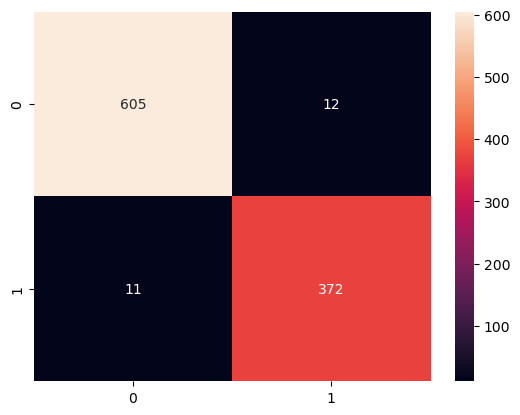

In [124]:
# Evaluate Logistic Model

evaluate_model(lr, X_test, y_test)

Logistic Regression model predict 97.7% of all cases. The model separates classes in 99,4% right.

Accuracy:  0.926
ROC_AUC:  0.9911218690623795
Classification Report:                precision    recall  f1-score   support

           0       0.89      1.00      0.94       617
           1       1.00      0.81      0.89       383

    accuracy                           0.93      1000
   macro avg       0.95      0.90      0.92      1000
weighted avg       0.93      0.93      0.92      1000



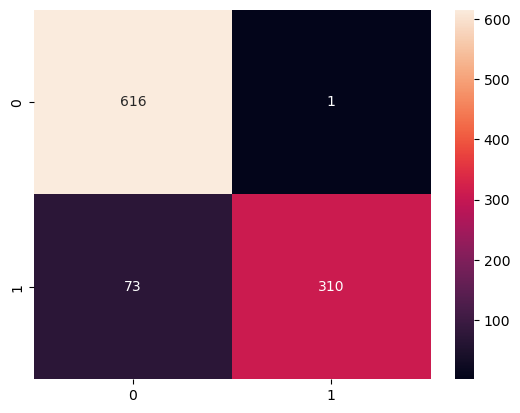

In [126]:
# Evaluate Random forest

evaluate_model(rf, X_test, y_test)

Random forest model predict 92.6% of all cases. The model separates classes in 99.1% right.

Accuracy:  0.978
ROC_AUC:  0.9974144242121611
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98       617
           1       0.98      0.96      0.97       383

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



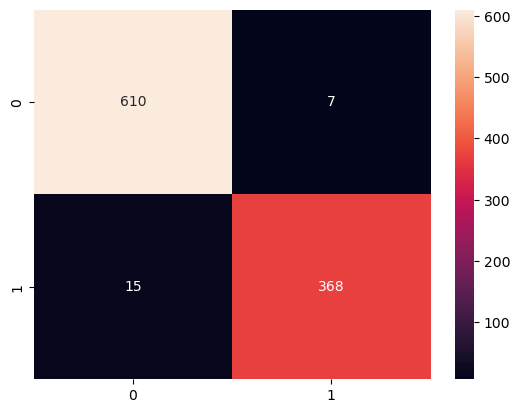

In [127]:
# Evaluate XGBoost
evaluate_model(xg, X_test, y_test)

XGBoost model predict 97.8% of all cases. The model separates classes in 99,7% right.

In [128]:
# Function for SVM
def evaluate_model_svm(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC_AUC:", roc_auc_score(y_test, y_score))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()

Accuracy: 0.972
ROC_AUC: 0.9938470913330314


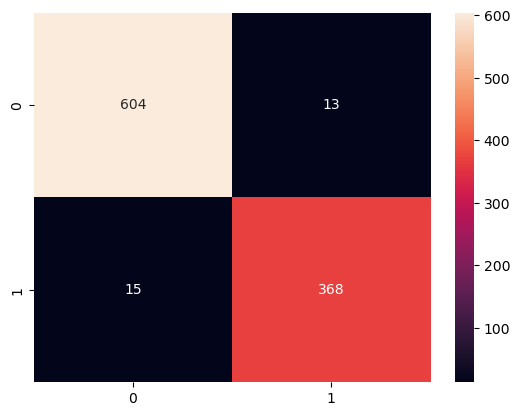

In [129]:
# Evaluate SVM
evaluate_model_svm(svm, X_test, y_test)

SVM model predict 97.2% of all cases. The model separates classes in 99,4% right.

In [61]:
## CNN for text. Model building
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 900 # size of vocabulary
max_len = 800       # max sequence length (matches your truncation)

# Use your lemmatized/truncated text column
texts = df['text_trunc'].astype(str)

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
X = pad_sequences(sequences, maxlen=max_len, padding='post')

X = np.array(X, dtype=np.int32)

y = df['generated'].values


In [62]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

tfidf2 = TfidfVectorizer(max_features=5000)

X_text = tfidf2.fit_transform(df["text_trunc"])
y = df["generated"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_text, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


X_train2 = X_train2.toarray()
X_test2  = X_test2.toarray()

embedding_dim = 100  

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train2, y_train2,
    validation_split=0.1,
    epochs=10,
    batch_size=16
)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 218s 955ms/step - accuracy: 0.5914 - loss: 0.6839 - val_accuracy: 0.6350 - val_loss: 0.6608
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 216s 959ms/step - accuracy: 0.5992 - loss: 0.6780 - val_accuracy: 0.6350 - val_loss: 0.6580
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 956ms/step - accuracy: 0.6133 - loss: 0.6722 - val_accuracy: 0.6350 - val_loss: 0.6596
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.6144 - loss: 0.6692 - val_accuracy: 0.6350 - val_loss: 0.6570
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.6144 - loss: 0.6704 - val_accuracy: 0.6350 - val_loss: 0.6615
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.6089 - loss: 0.6713 - val_accuracy: 0.6350 - val_loss: 0.6668
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 936s 4s/step - accuracy: 0.6094 - loss: 0.6736 - val_accuracy: 0.6350 - val_loss: 0.6575
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 225s 998ms/step - accuracy: 0.6144 - loss: 0.669

In [64]:
loss, accuracy = model.evaluate(X_test2, y_test2)
print("Accuracy:", accuracy)



y_prob2 = model.predict(X_test2)
print("ROC-AUC-Score: ", roc_auc_score(y_test2, y_prob2))

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.6170 - loss: 0.6673
Accuracy: 0.6169999837875366
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step
ROC-AUC-Score:  0.5


By CNN model we got the lowest accuracy that is equal to 62% and Roc is 50%

the best result shows XGBoost model.

# SHAP

In [66]:
#!pip install shap

In [67]:
import shap

In [68]:
print(type(X_train))
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
                                             text_trunc  length
794   the electoral college be not a place but a pro...     282
597   the electoral college be a system that should ...     664
3091  carefree city in argument for limit car usage ...     274
3812  successful people be fall of life and they be ...     101
12    as a memeber of the seagoe cowboy it would be ...     224


In [130]:
# TF-IDF + XGBoost

X2 = df["text"]
y2 = df["generated"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2,
    y2,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ---- TFIDF ----
tfidf3 = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.95
)

# ---- XGBOOST ----
xg3 = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1
)

# ---- PIPELINE ----
pipeline = Pipeline([
    ("tfidf", tfidf3),
    ("clf", xg3)
])

pipeline.fit(X_train3, y_train3)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [131]:
explainer = shap.TreeExplainer(pipeline.named_steps["clf"])

# Transform test data
X_test_tfidf = pipeline.named_steps['tfidf'].transform(X_test)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_tfidf)

In [132]:
# Get feature names
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

# Example: SHAP values for first test sample
i = 0
sample_shap = shap_values[i].flatten()  # if sparse
top_idx = np.argsort(np.abs(sample_shap))[-10:][::-1]  # top 10 features
for idx in top_idx:
    print(feature_names[idx], sample_shap[idx])

because 1.6190374
is 0.5547729
would 0.50919086
if 0.49238235
you 0.43866974
like 0.40817806
very 0.33929637
get 0.33713645
but 0.3274632
conclusion -0.3249054


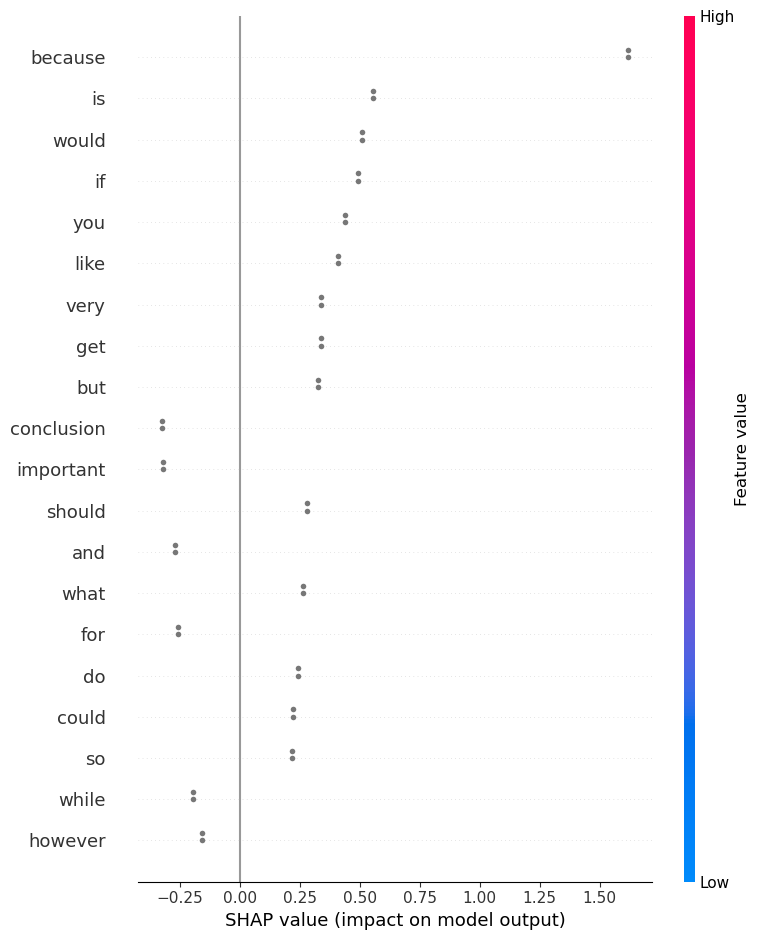

In [133]:
#shap.summary_plot(shap_values, X_test_tfidf, feature_names=feature_names, max_display=20)
shap.summary_plot(
    shap_values,
    X_test_tfidf,
    feature_names=feature_names,
    show=True
)

Shows most important words across all test samples.

Positive SHAP value → word pushes prediction toward label 1.

Negative SHAP value → word pushes prediction toward label 0.

The most important words for evaluating text are BECAUSE, IS, WOULD, VERY, Important.

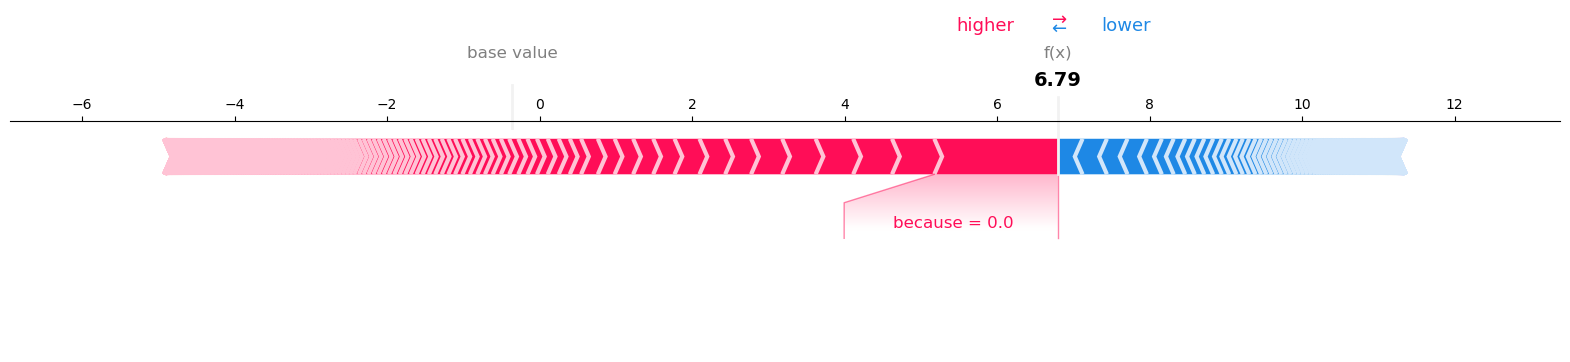

In [134]:
index = 1
x_dense = X_test_tfidf[index].toarray().ravel()

shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    x_dense,
    feature_names=tfidf3.get_feature_names_out(),
    matplotlib=True
)

Es example we use text with index=1. Base value is about -0.2, f(x)=6.79, what is positive. It is the reason why model decided this test was generated by AI.

In [135]:
# Streamlit
import joblib
joblib.dump(xg, "xg.joblib", compress=("gzip", 9))

['xg.joblib']

In [136]:
import os
os.path.getsize("xg.joblib") / 1024 / 1024

5.730388641357422